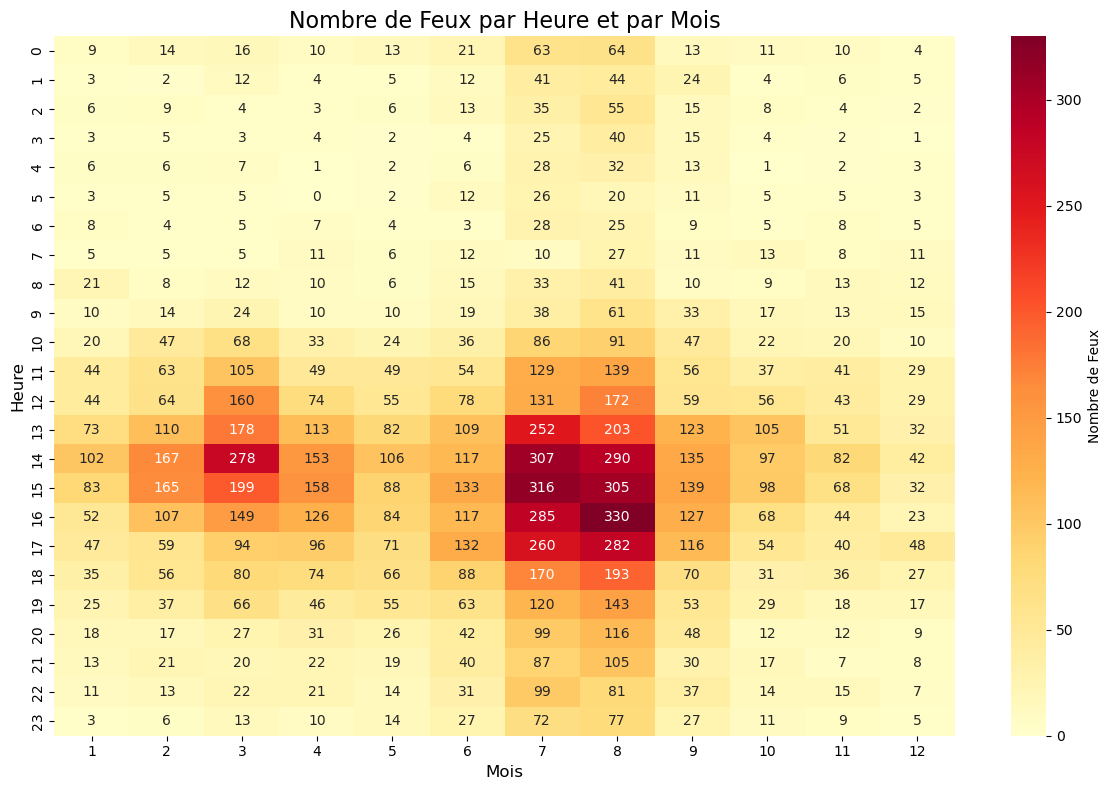

In [17]:
# Création du graphe thermique du nombre de feyx par heure et par mois
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as tickerb
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

file_path = 'Incendos.csv'
data = pd.read_csv(file_path, encoding='latin1', sep=';')
fires_by_hour_month = data.groupby(['Mois', 'Heure']).size().reset_index(name='Nombre_de_feux')

# Ici j'ai utilisé le tableau pivot pour une meilleure visualisation
pivot_table = fires_by_hour_month.pivot_table(index='Heure', columns='Mois', values='Nombre_de_feux', fill_value=0)
pivot_table = pivot_table.astype(int)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Nombre de Feux'})
plt.title("Nombre de Feux par Heure et par Mois", fontsize=16)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Heure", fontsize=12)
plt.tight_layout()
plt.show()

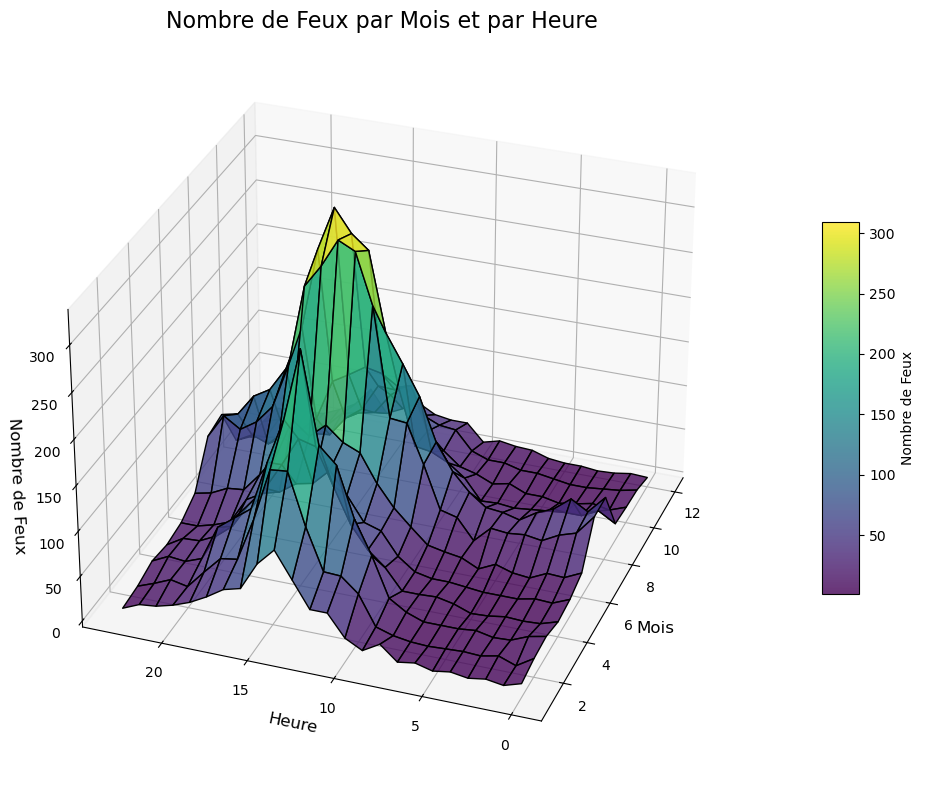

In [13]:
#création d'un graphe 3D du nombre de feux par mois et par heure
fires_by_hour_month = data.groupby(['Mois', 'Heure']).size().reset_index(name='Nombre_de_feux')
pivot_table = fires_by_hour_month.pivot_table(index='Heure', columns='Mois', values='Nombre_de_feux', fill_value=0)

# Ici, je prépare la visualisation en 3D
x = pivot_table.columns.values  # pour les Mois
y = pivot_table.index.values    # pour les Heures
x, y = np.meshgrid(x, y)
z = pivot_table.values          # pour le Nombre de feux
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_title("Nombre de Feux par Mois et par Heure", fontsize=16)
ax.set_xlabel("Mois", fontsize=12)
ax.set_ylabel("Heure", fontsize=12)
ax.set_zlabel("Nombre de Feux", fontsize=12)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label='Nombre de Feux')

# Ajustement de l'angle de vue
ax.view_init(30, 200) 
plt.tight_layout()
plt.show()


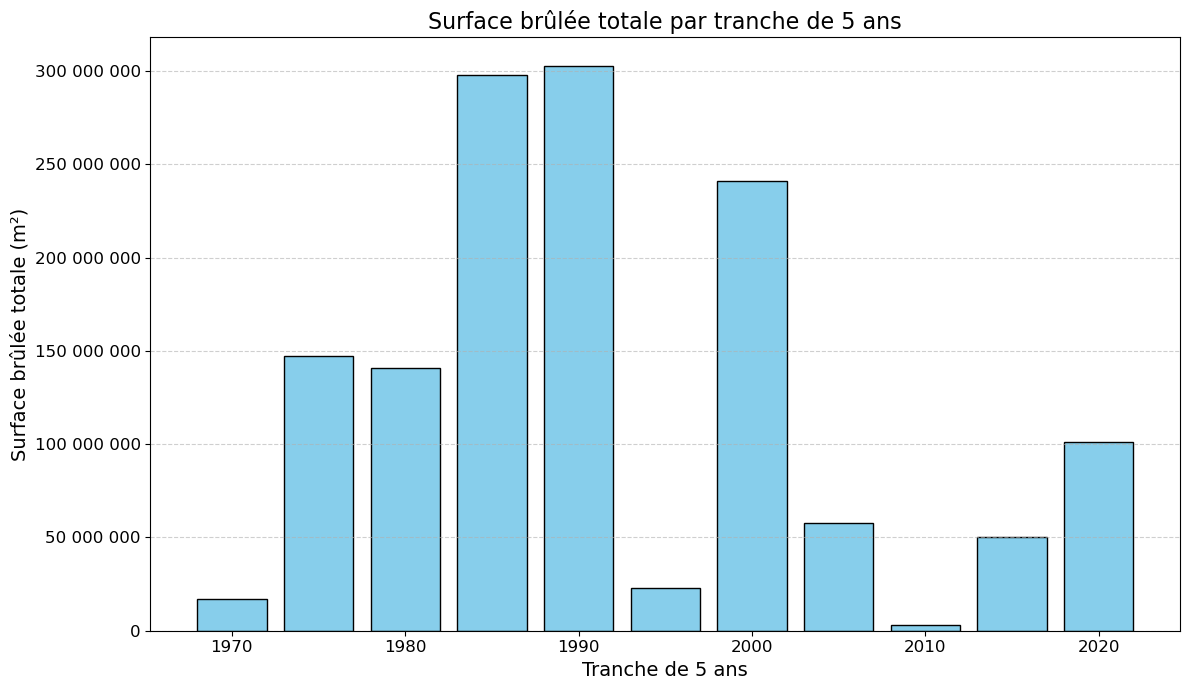

In [14]:
#Création d'un graphique de la surface brulée totale par tranche de 5 ans
data['Surface_m2'] = pd.to_numeric(data['Surface_m2'], errors='coerce')
data['Annee'] = pd.to_numeric(data['Annee'], errors='coerce')

# Ici j'ai ajouté une colonne pour les tranche de 5 ans
data['Tranche 5 ans'] = (data['Annee'] // 5) * 5
somme_surface_5_ans = data.groupby('Tranche 5 ans')['Surface_m2'].sum()
plt.figure(figsize=(12, 7))
plt.bar(somme_surface_5_ans.index, somme_surface_5_ans.values, width=4, color='skyblue', edgecolor='black')
plt.xlabel('Tranche de 5 ans', fontsize=14)
plt.ylabel('Surface brûlée totale (m²)', fontsize=14)
plt.title('Surface brûlée totale par tranche de 5 ans', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()


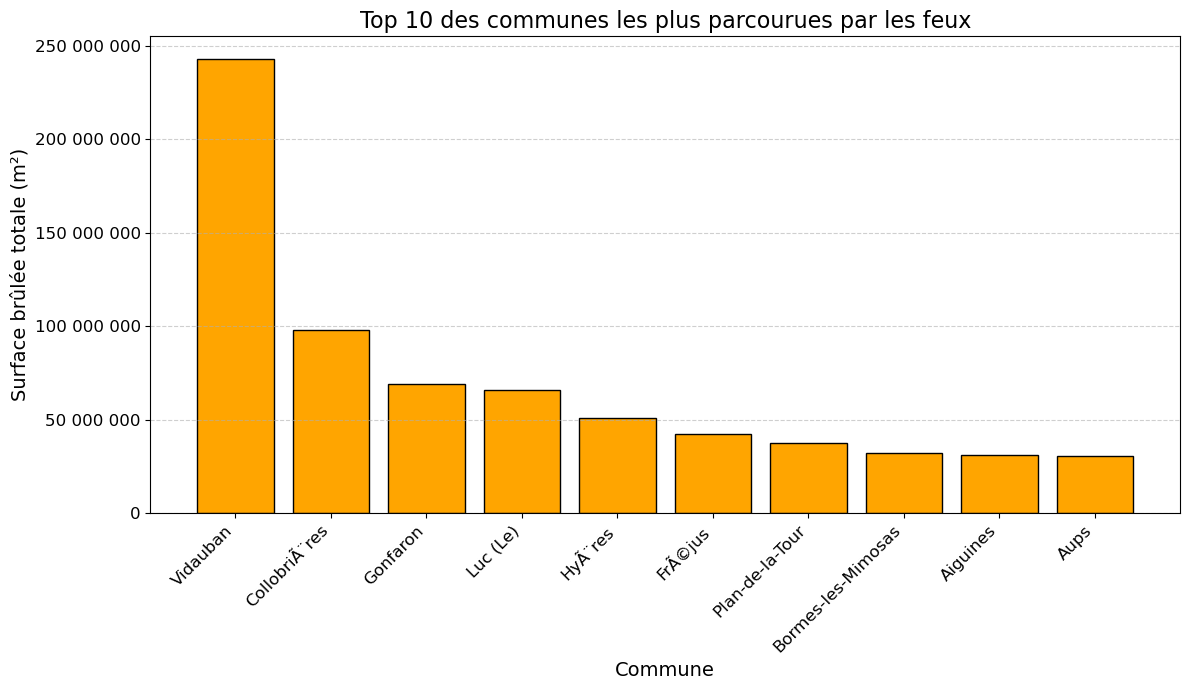

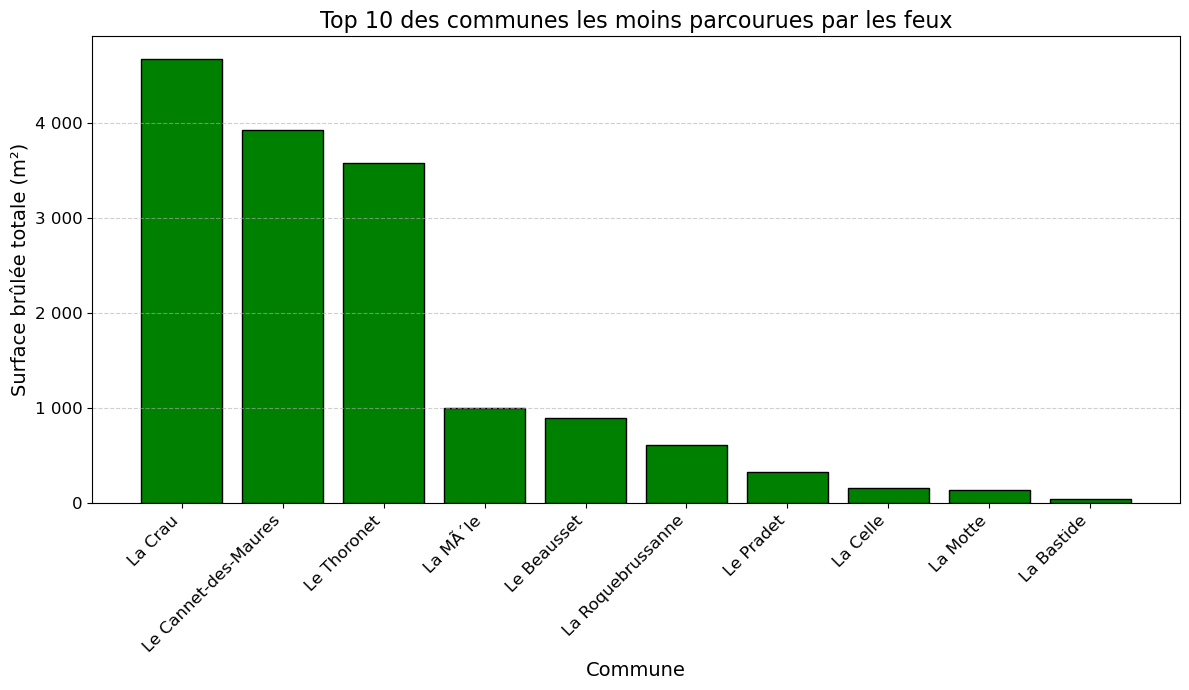

In [18]:
# Création de graphique des top 10 communes affectées et moins affectées par les feux de forets
data['Surface_m2'] = pd.to_numeric(data['Surface_m2'], errors='coerce')
data['Nom_commune'] = data['Nom_commune'].fillna('Inconnue')

somme_surface_commune = data.groupby('Nom_commune')['Surface_m2'].sum()
somme_surface_commune_sorted = somme_surface_commune.sort_values(ascending=False)

top_communes = somme_surface_commune_sorted.head(10)
plt.figure(figsize=(12, 7))
plt.bar(top_communes.index, top_communes.values, color='orange', edgecolor='black')
plt.xlabel('Commune', fontsize=14)
plt.ylabel('Surface brûlée totale (m²)', fontsize=14)
plt.title('Top 10 des communes les plus parcourues par les feux', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

bottom_communes = somme_surface_commune_sorted.tail(10)
plt.figure(figsize=(12, 7))
plt.bar(bottom_communes.index, bottom_communes.values, color='green', edgecolor='black')
plt.xlabel('Commune', fontsize=14)
plt.ylabel('Surface brûlée totale (m²)', fontsize=14)
plt.title('Top 10 des communes les moins parcourues par les feux', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()


Colonnes après rechargement : ['Annee', 'Carreau_dfci', 'Departement', 'Code_INSEE', 'Nom_commune', 'Alerte', 'Mois', 'Heure', 'Surface_m2', 'Surface_foret_m2', 'Surface_feu_arrivee_secours', 'Peuplement', 'Cause']


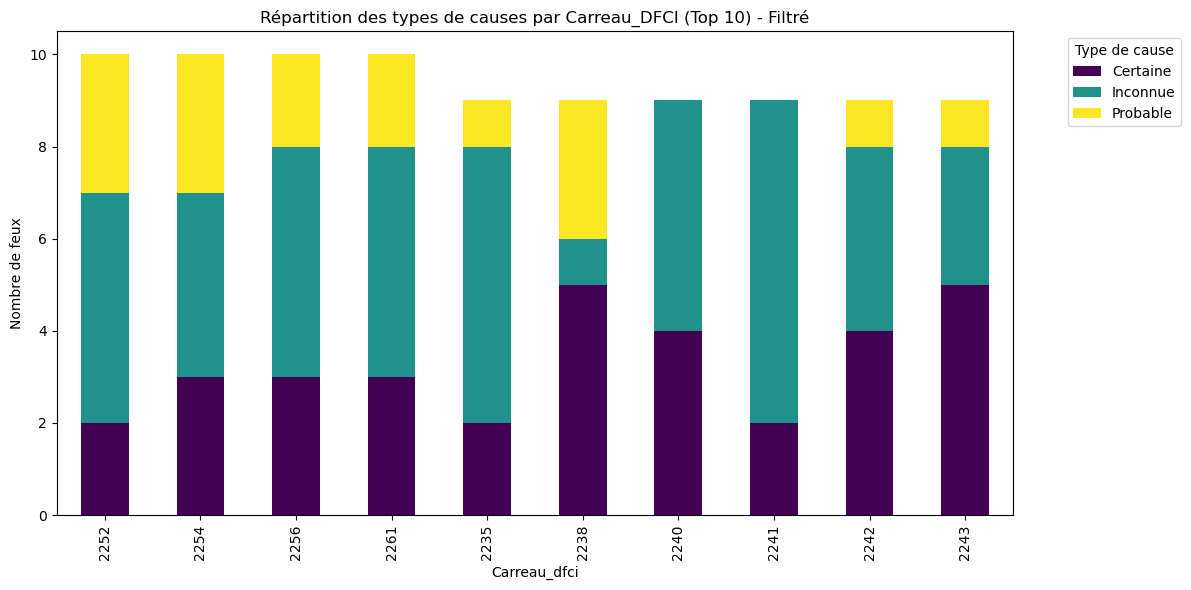

In [21]:
# création du graphique de repartition des types de causes par carreau dfci
data_df = pd.read_csv(file_path, delimiter=';')
print("Colonnes après rechargement :", data_df.columns.tolist())
data_df['Cause'] = data_df['Cause'].str.strip().str.capitalize()
valid_causes = ['Certaine', 'Inconnue', 'Probable']
data_df = data_df[data_df['Cause'].isin(valid_causes)]

# Ici j'ai créé un tableau croisé dynamique pour les causes par Carreau_DFCI
cause_pivot = data_df.pivot_table(
    index='Carreau_dfci',
    columns='Cause',
    aggfunc='size',
    fill_value=0
)

top_carreaux_causes = cause_pivot.sum(axis=1).nlargest(10).index
filtered_cause_pivot = cause_pivot.loc[top_carreaux_causes]
filtered_cause_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Répartition des types de causes par Carreau_DFCI (Top 10) - Filtré")
plt.xlabel("Carreau_dfci")
plt.ylabel("Nombre de feux")
plt.legend(title="Type de cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Shapefile chargé avec succès.
Fichier CSV chargé avec succès.


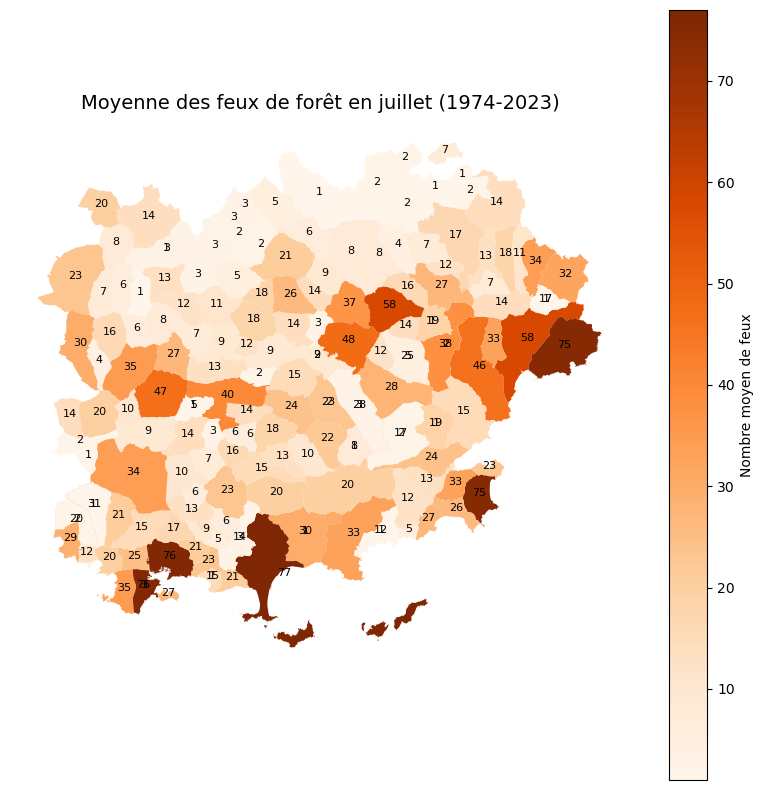

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Chemins des fichiers
shapefile_path = 'Commune_var.shp'
july_data_path = 'Moyenne_des_Feux_en_Juillet_par_Commune_avec_Code_INSEE.csv'

# Chargement des fichiers
try:
    communes = gpd.read_file(shapefile_path)
    print("Shapefile chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement du shapefile : {e}")
    raise

try:
    july_data = pd.read_csv(july_data_path, delimiter=',')
    print("Fichier CSV chargé avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement des données CSV : {e}")
    raise

# Renommer les colonnes si nécessaire
if ',Code_INSEE' in july_data.columns:
    july_data.rename(columns={',Code_INSEE': 'Code_INSEE'}, inplace=True)

# Conversion des types pour compatibilité
communes['INSEE_COM'] = communes['INSEE_COM'].astype(str)
july_data['Code_INSEE'] = july_data['Code_INSEE'].astype(str)

# Jointure des données
communes_july = communes.merge(july_data, left_on='INSEE_COM', right_on='Code_INSEE', how='left')

# Vérification de la colonne cible
correct_column_name_july = 'Nombre de feux'
if correct_column_name_july not in communes_july.columns:
    print(f"Erreur : la colonne '{correct_column_name_july}' est introuvable dans les données jointes.")
    print(f"Colonnes disponibles : {communes_july.columns.tolist()}")
    raise KeyError(f"Colonne '{correct_column_name_july}' manquante.")

# Fonction pour générer la carte avec étiquettes
def generate_map_with_labels(data, column, title, cmap='Oranges'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    data.plot(
        column=column, 
        ax=ax, 
        legend=True, 
        cmap=cmap,
        legend_kwds={'label': "Nombre moyen de feux"}
    )
    
    # Ajouter les étiquettes (si la géométrie est valide)
    for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data[column]):
        if not pd.isna(label):
            ax.text(x, y, str(int(round(label))), fontsize=8, ha='center', color='black')
    
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    plt.show()

# Générer la carte
generate_map_with_labels(communes_july, correct_column_name_july, "Moyenne des feux de forêt en juillet (1974-2023)")


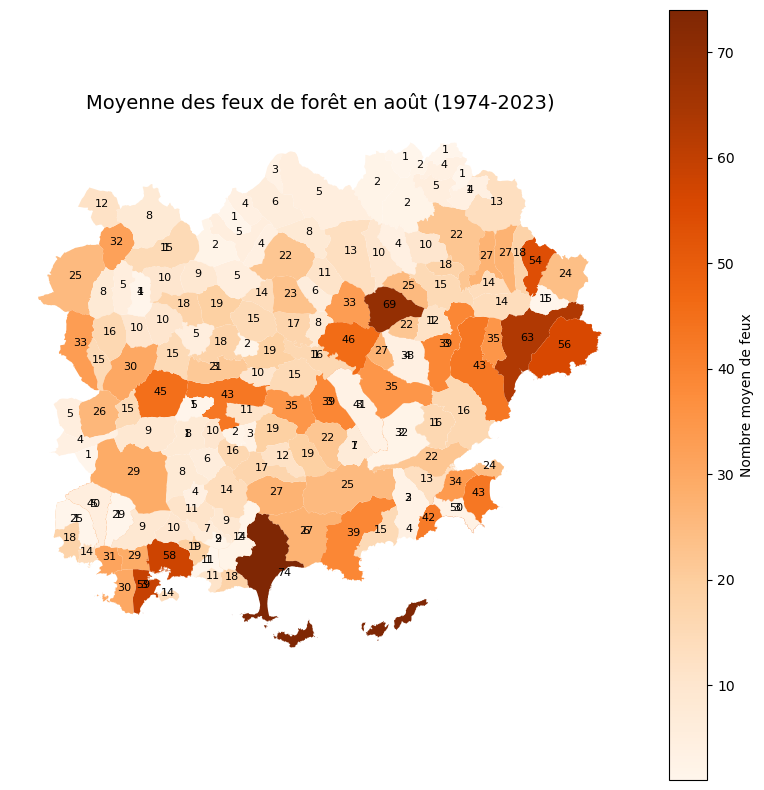

In [24]:
# Création d'une carte de la moyenne des feu de forets en aout entre 1974 et 2023
shapefile_path = 'Commune_var.shp'
communes = gpd.read_file(shapefile_path)

august_data_path = 'Moyenne_des_Feux_en_Ao_t_par_Commune_avec_Code_INSEE.csv'
august_data = pd.read_csv(august_data_path, delimiter=',')
august_data.rename(columns={',Code_INSEE': 'Code_INSEE'}, inplace=True)

communes['INSEE_COM'] = communes['INSEE_COM'].astype(str)
august_data['Code_INSEE'] = august_data['Code_INSEE'].astype(str)

communes_august = communes.merge(august_data, left_on='INSEE_COM', right_on='Code_INSEE', how='left')
correct_column_name_august = 'Nombre de feux'  

def generate_map_with_labels(data, column, title, cmap='Oranges'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    data.plot(
        column=column, 
        ax=ax, 
        legend=True, 
        cmap=cmap,
        legend_kwds={'label': "Nombre moyen de feux"}
    )
   
    for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data[column]):
        if not pd.isna(label):
            ax.text(x, y, str(int(round(label))), fontsize=8, ha='center', color='black')
    
    ax.set_title(title, fontsize=14)
    ax.axis('off')
    plt.show()
generate_map_with_labels(communes_august, correct_column_name_august, "Moyenne des feux de forêt en août (1974-2023)")


In [31]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


Colonnes dans feu_par_commune: Index(['Code INSEE', 'Nombre feu', 'Surface brulee ha'], dtype='object')
Colonnes dans communes: Index(['ID', 'INSEE_COM', 'INSEE_ARR', 'INSEE_COL', 'INSEE_DEP', 'INSEE_REG',
       'POPULATION', 'SURFACE_HA', 'DATE_CREAT', 'DATE_MAJ', 'DATE_APP',
       'DATE_CONF', 'CODE_POST', 'NOM', 'CL_ARROND', 'CL_COLLTER', 'CL_DEPART',
       'CL_REGION', 'CAPITALE', 'DATE_RCT', 'RECENSEUR', 'SIREN_EPCI',
       'ID_CH_LIEU', 'ID_AUT_ADM', 'CODE_SIREN', 'geometry'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_2684\196247404.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('OrRd')


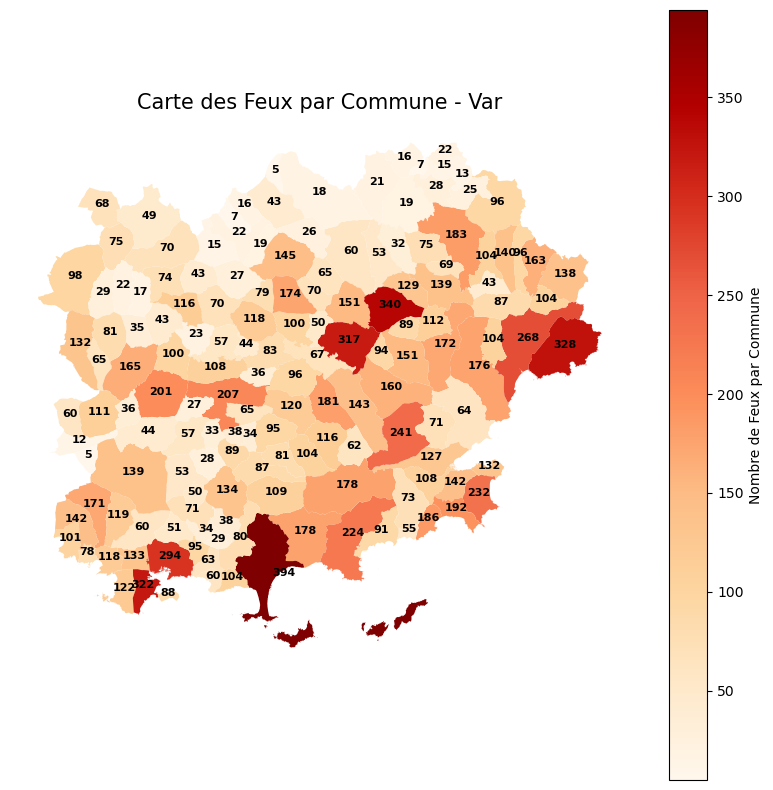

In [25]:
# création de la carte des feux par commune au var
import matplotlib


feu_par_commune_path = 'feu_par_commune.csv'
commune_shapefile_path = 'Commune_var.shp'
feu_par_commune = pd.read_csv(feu_par_commune_path, encoding='latin1', sep=';')
communes = gpd.read_file(commune_shapefile_path)

# Ici je vérifie les colonnes disponibles dans les deux fichiers
print("Colonnes dans feu_par_commune:", feu_par_commune.columns)
print("Colonnes dans communes:", communes.columns)
communes = communes.rename(columns={'NOM_COM': 'Commune'})
feu_par_commune = feu_par_commune.rename(columns={'Code INSEE': 'INSEE_COM', 'Nombre feu': 'Nombre de Feux'})

carte_feux = communes.merge(feu_par_commune, on='INSEE_COM', how='left')

carte_feux['Nombre de Feux'] = carte_feux['Nombre de Feux'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = matplotlib.cm.get_cmap('OrRd')
carte_feux.plot(column='Nombre de Feux', 
                cmap=cmap, 
                legend=True, 
                legend_kwds={'label': "Nombre de Feux par Commune",
                             'orientation': "vertical"},
                ax=ax)

for x, y, label in zip(carte_feux.geometry.centroid.x, 
                       carte_feux.geometry.centroid.y, 
                       carte_feux['Nombre de Feux']):
    ax.text(x, y, int(label), fontsize=8, ha='center', weight='bold', color='black')


ax.set_title("Carte des Feux par Commune - Var", fontsize=15)
ax.axis('off')
plt.show()
